In [6]:
import numpy as np
import pandas as pd
df = pd.read_csv('winequality-red[1].csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Now let’s divide our dataset.

In [10]:
import tensorflow as tf
 
# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)
 
# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)

In [12]:
# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)
 
range = max_val - min_val
train_df = (train_df - min_val)/(range)
 
val_df =  (val_df- min_val)/range

In [14]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']
 
# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1]]
 
input_shape

[11]

# Create Model Neural Network

# Create a linear Model

In [16]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


# Creating a Multilayered Neural Network

In [18]:
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                768       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [20]:

model.compile(optimizer='adam', 
               
              # MAE error is good for
              # numerical predictions
              loss='mae') 

# Training The Model

In [30]:
losses = model.fit(X_train, y_train,
 
                   validation_data=(X_val, y_val),
                    
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch
 
                   )

Epoch 1/15
5/5 [==============================] - 0s 15ms/step - loss: 0.0963 - val_loss: 0.1000
Epoch 2/15
5/5 [==============================] - 0s 5ms/step - loss: 0.0961 - val_loss: 0.0997
Epoch 3/15
5/5 [==============================] - 0s 5ms/step - loss: 0.0957 - val_loss: 0.0996
Epoch 4/15
5/5 [==============================] - 0s 8ms/step - loss: 0.0953 - val_loss: 0.0995
Epoch 5/15
5/5 [==============================] - 0s 7ms/step - loss: 0.0953 - val_loss: 0.0996
Epoch 6/15
5/5 [==============================] - 0s 7ms/step - loss: 0.0954 - val_loss: 0.0993
Epoch 7/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0948 - val_loss: 0.0992
Epoch 8/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0945 - val_loss: 0.0990
Epoch 9/15
5/5 [==============================] - 0s 5ms/step - loss: 0.0943 - val_loss: 0.0989
Epoch 10/15
5/5 [==============================] - 0s 6ms/step - loss: 0.0940 - val_loss: 0.0988
Epoch 11/15
5/5 [=====================

# Generate Predictions and Analyze Accuracy

In [32]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[0:3, :])

1/1 [==============================] - 0s 17ms/step


array([[0.39490834],
       [0.51943684],
       [0.39907753]], dtype=float32)

# Now, let’s compare our predictions with the target value.

In [34]:
y_val.iloc[0:3]

0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

# Visualize Training Vs Validation Loss

<Axes: >

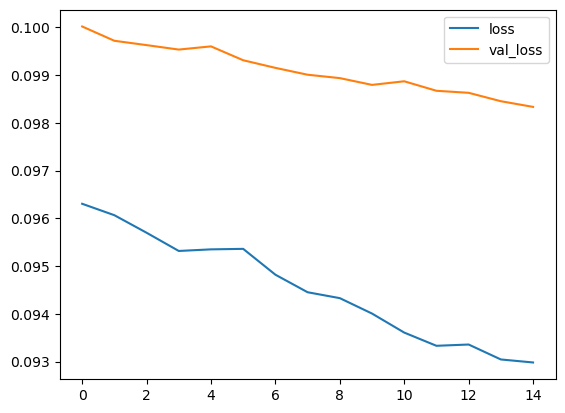

In [36]:
loss_df = pd.DataFrame(losses.history)
 
# history stores the loss/val
# loss in each epoch
 
# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()